

# Project: Analyzing a TMDb Movies Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The goal behind this analysis is to investigate the TMDb movies dataset and try to answer simple questions and find some correlation between some the attributes.
>>
> In this dataset we are going to answer these questions:
* Which Genres are Popular Through the Years?
* What are the Top 10 and Most Popular Movies?
* In which year was the highest number of movies released?
* Do movies with higher votes receive better ratings?
* Are Long or Short Movies the Most Popular?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> n this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('C:/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check how many rows and columns are in the dataset:

df.shape

(10866, 21)

In [4]:
#check the datatypes of every attribute in the dataset and see which columns have missing values:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#To have a breif overview about some statistics on dataset columns:

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Finding the number of missing values in each and every column:

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#find the number of duplicated rows
sum(df.duplicated())

1

### Data Cleaning 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [9]:
#Drop columns that are not needed in our investigation process:

df.drop(['imdb_id', 'cast', 'homepage','director','tagline','keywords','overview','budget_adj','revenue_adj'], inplace=True, axis=1)

In [10]:
#Dataset after dropping the unncessary columns:
df.shape

(10866, 12)

In [11]:
#drop the nulls

df.dropna(inplace=True)

In [12]:
# to check if the above "drop()" function worked 
df.isnull().sum().any()

False

In [13]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [14]:
#to check if the above "drop_duplicates()" function worked
print(df.duplicated().sum())

0


In [15]:
#Since the "revenue", "budget" and "runtime" columns have so many 0's, we will replace this with NAN and then drop them 
 
df['revenue'].replace(0, np.NAN, inplace=True)

df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [16]:
# Changing format Of "release_date" from into Datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
#check the above statement worked
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [17]:
# split the rows with multiple values seperated by (|)


df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

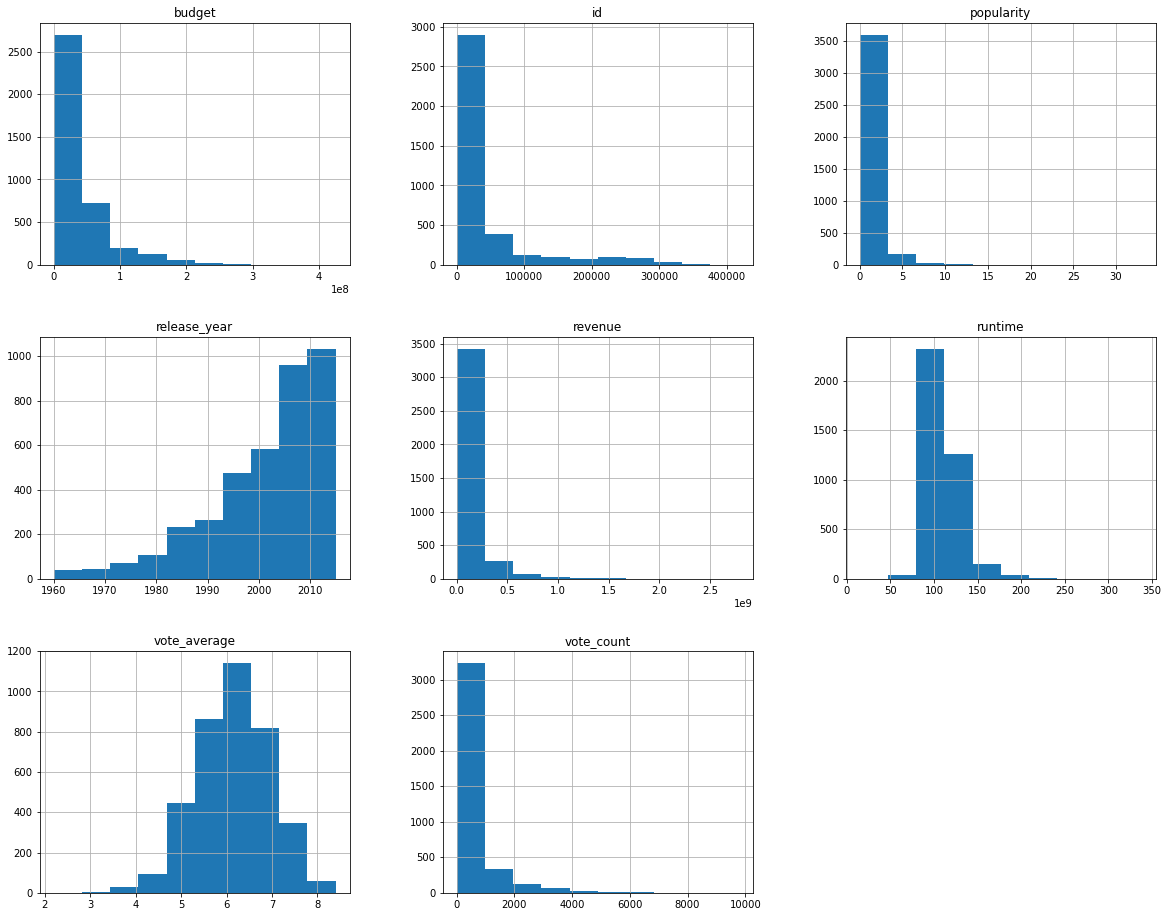

In [18]:
#Befor starting answering our stated questions, let's have a general visualization of the data distribution


df.hist(figsize=(20,16));

### Research Question 1: Which Genres are Popular Through the Years?

> In this question, we will investigate which genres are most popular and which are the least.

In [19]:
genres_popularity = df.groupby(['genres'])['popularity'].mean()
print (genres_popularity)

genres
Action             1.451147
Adventure          1.915165
Animation          1.739861
Comedy             0.924824
Crime              1.074895
Documentary        0.336343
Drama              0.937800
Family             1.609295
Fantasy            1.595149
History            1.442235
Horror             0.860527
Music              0.914098
Mystery            1.133780
Romance            1.386988
Science Fiction    1.931437
TV Movie           0.273628
Thriller           1.171430
War                1.658497
Western            1.193918
Name: popularity, dtype: float64


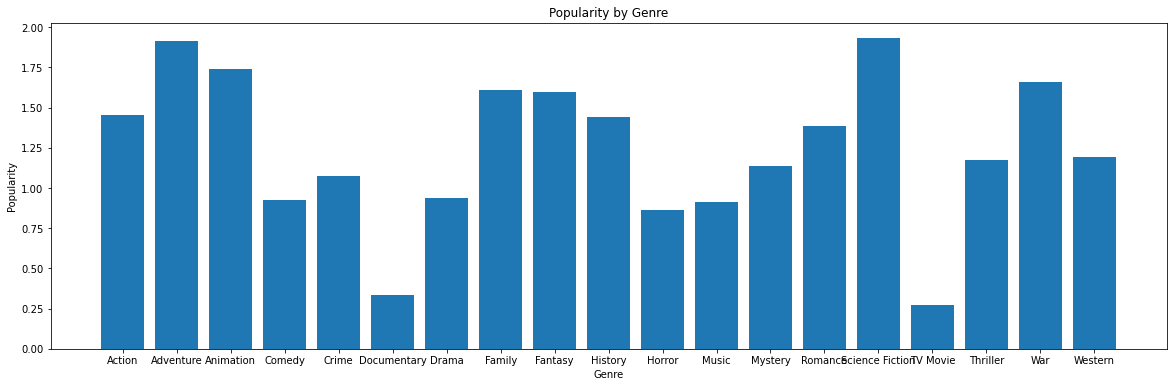

In [20]:
plt.subplots(figsize=(20, 6))
plt.bar(genres_popularity.index, genres_popularity)
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity');

> The Bar Chart shows us the movies' genres in the X axis, wherease the Y axis shows the popularity of the movie genre. 
> From the chart we can see that the most popular movies are of Adventure and Science Fiction type. Followed by Animation, War, Family and Fantasy. The least popular movies are Documentary and TV shows. 
> This may be useful for production companies to look at when they would like to produce a new movie, so they can know what people like the most.

### Research Question 2: What are the Top 10 and Most Popular Movies?

> Now that we knew the Adventure and Science Fiction movies are the most popular movies genres, let's start investigating which movies are the most popular. 

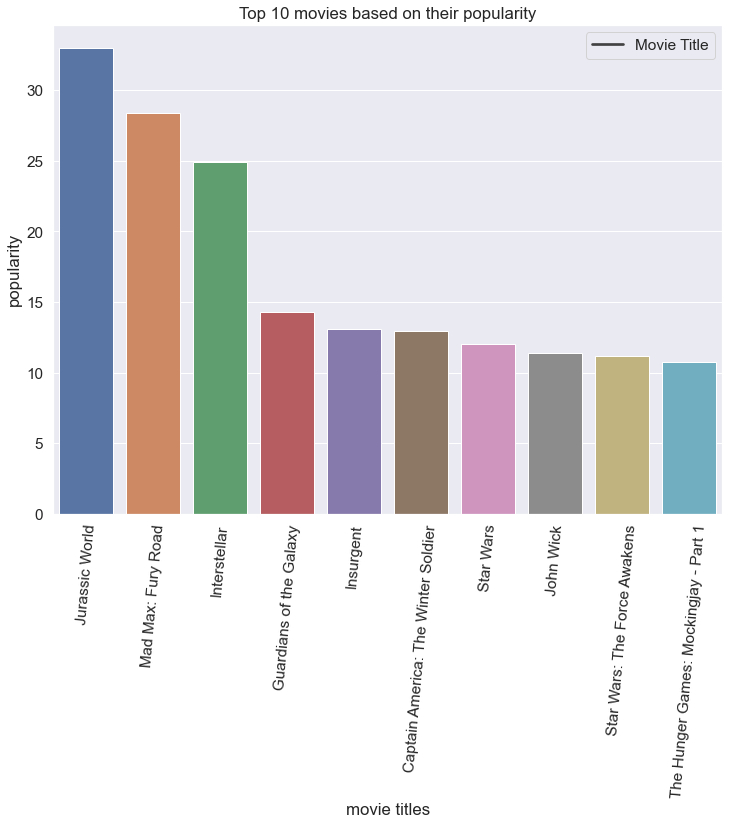

In [21]:

#Top 10 movie with the highest popularity
movies_and_popularity = df[['original_title','popularity']]
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.legend(['Movie Title'])
plt.show()

> Most of the movies shown in the chart are of type Adventure, Science Fiction or Action. "Jurassic World", as it is both an Adventure and Science Fiction film seems to be the most popular movie and "The Hunger Games Part1" is the least.

### Research Question 3: When was the highest realese of movies?

> In this question, we will try to find which year has produced the highest number of movies.

release_year
2011    196
2012    157
2013    179
2014    165
2015    160
Name: id, dtype: int64


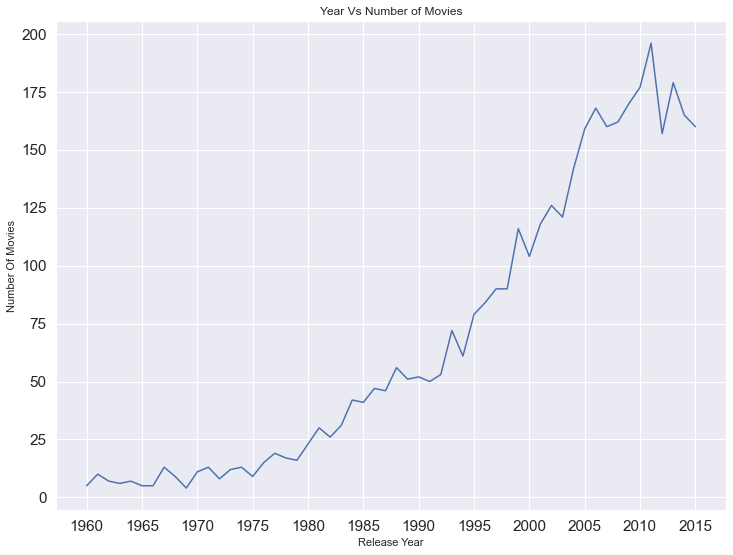

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


# make group for each year and count the number of movies in each year 
date=df.groupby('release_year').count()['id']
print(date.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number of Movies",fontsize = 12)
plt.xlabel('Release Year',fontsize = 11)
plt.ylabel('Number Of Movies',fontsize = 11)
#set the style sheet
sns.set_style("whitegrid")


> It is cleare from the drawing  that the more years passed, the more films were produced. The years between 2010 and 2015 have the highest number of movies released. From 1960 to 1980, there was some stability. This may be due to the number of the production companies before, or due to the number of the media where people will watch the film.

### Research Question 4:  Did movies with higher vote count received a better rating?

> Now, we will find the relationship between the number of voters and the voting average.  

In [23]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]


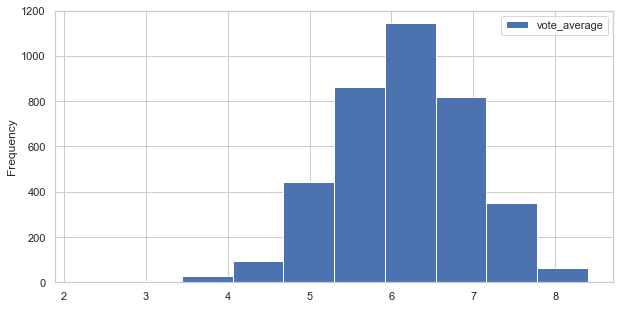

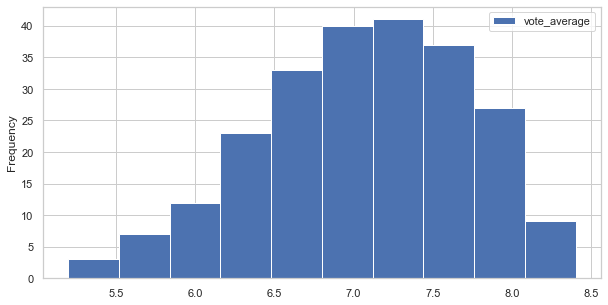

In [26]:
df_vote.plot(x='vote_count', y='vote_average', kind='hist');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='hist');

In [28]:
d1 = df['vote_count']
d2 = df['vote_average']

correlation = d1.corr(d2)
print(correlation)

0.39000847891031915


>  The graph shows us that their is some correlation between the number of votes received and the popularity of the movie. We cannot determine that the more voter make the movie of a better rating and vice versa, because it is shown in the plot that the highest rating which is 8.5 has less voters than the average rating which is 7. 

### Research Question 5: Are Long or Short Movies the Most Popular?

> Let's find the popularity of a movie based on its runtime.

In [29]:
shorter_movies = df.sort_values(by=['runtime'], ascending = False).head(200)
runtime = shorter_movies['runtime']
popularity = shorter_movies['popularity']

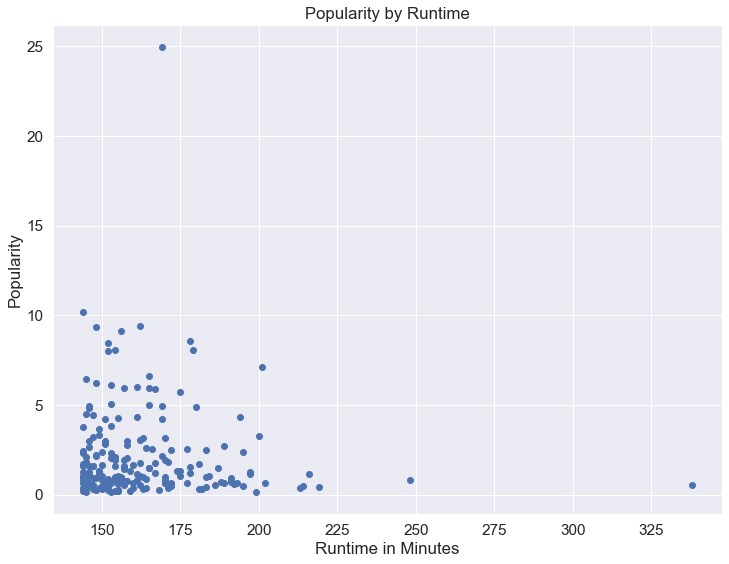

In [38]:
plt.scatter(runtime, popularity)
plt.title('Popularity by Runtime')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Popularity');
plt.show()

> The shorter the movie, the most popular it is. Movies from 150 minutes to 175 minutes are the most popular. Maybe because people get bored when the movie is more than 2 hours!

<a id='conclusions'></a>
## Conclusions

> After our simple analysis over this dataset, we figured out some problems in the data; ranging from null data to zero's entries to columns that are not needed in this analysis. Which are by the way stop us to do further analysis on the data. However, after cleaning up the data, we came to know that since 1960, the number of movies produced have increased overtime. Adventure and Science Fiction movies are the most popular movies and when it comes to the top 10 movies, Jurassic World came at first. Furthermore, we found that there are some correlations between the number of votes for the movie and the rating range; 7.5 was the average rating.

### Limitations 
> Although this dataset is full of information which can let us answer so many questions and even predict some results, the so many Nulls and Zero's prevented us from the analysis especially with numeric values. Zero's also may give us false results so that they have to be removed.

> I tried to stay away from the "Budget" and "Revenue" columns as we do not know in which currency each and every movie has been produced in. 

> Maybe in the near future analyses, we introduce some Machine Learning algorithms and deeper Statistics and answer deeper questions and even predict some results. For example, we can predict whether a movie will be liked or not based on its genres or cast for example. We may also 